In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit_data = pd.read_csv("credit_risk.csv")

In [3]:
credit_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [5]:
credit_data.describe()

,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
credit_data.isnull().sum()

over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [7]:
X = credit_data.columns.drop("class")
y = credit_data['class']

In [8]:
X

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [9]:
credit_data_encoded=pd.get_dummies(credit_data[X])

In [10]:
len(credit_data_encoded.columns)

61

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =1,min_samples_split=20)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=1)

In [13]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [14]:
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)

Accuracy of the model on train data =  0.8635294117647059
Accuracy of the model on test data =  0.6666666666666666


In [15]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [16]:
# Find accuracy using the test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_pred, y_test)))

Accuracy: 0.7266666666666667


In [17]:
from sklearn.tree import export_graphviz
import graphviz 

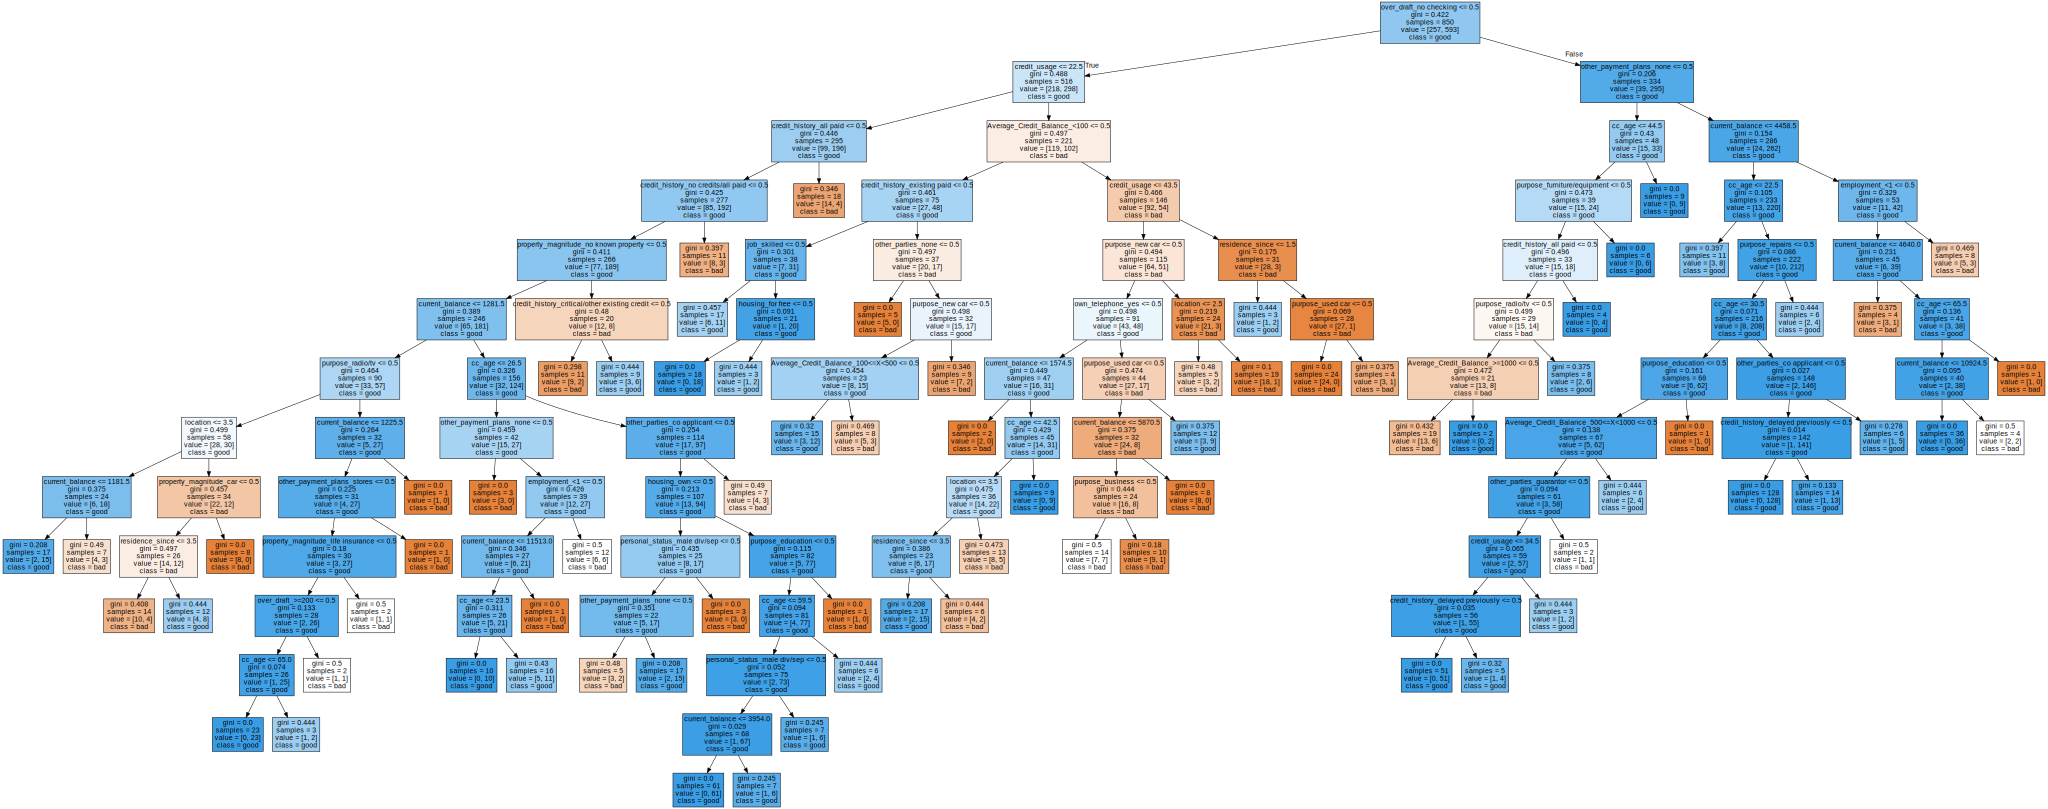

In [18]:
dd=export_graphviz(model,out_file=None,
                  feature_names=credit_data_encoded.columns,
                  class_names=model.classes_,
                  filled=True)
graph = graphviz.Source(dd)
graph

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
train_cf=confusion_matrix(y_train,train_predictions)
test_cf=confusion_matrix(y_test,test_predictions)

In [21]:
pd.DataFrame(train_cf)

,0,1
0,207,50
1,66,527


In [22]:
pd.DataFrame(test_cf)


,0,1
0,17,26
1,24,83


In [23]:
train_crct_pred=train_cf[0][0]+train_cf[1][1]
train_total_predictions = train_cf.sum()
train_accuracy = train_crct_pred/train_total_predictions
print(train_accuracy)

0.8635294117647059


In [24]:
test_crct_pred=test_cf[0][0]+test_cf[1][1]
test_total_predictions = test_cf.sum()
test_accuracy = test_crct_pred/test_total_predictions
print(test_accuracy)

0.6666666666666666


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_train,train_predictions))

              precision    recall  f1-score   support

         bad       0.76      0.81      0.78       257
        good       0.91      0.89      0.90       593

    accuracy                           0.86       850
   macro avg       0.84      0.85      0.84       850
weighted avg       0.87      0.86      0.86       850



In [27]:
# report based on test data
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

         bad       0.41      0.40      0.40        43
        good       0.76      0.78      0.77       107

    accuracy                           0.67       150
   macro avg       0.59      0.59      0.59       150
weighted avg       0.66      0.67      0.66       150

